In [8]:
import easyocr as eo
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2


In [23]:
img_path = 'maks/maks_1.jpeg'

In [16]:
from PIL import Image, ExifTags
import numpy as np

def get_oriented_image_array(image_path):
    """
    Loads an image, checks its EXIF orientation metadata, and applies the correct rotation.
    Returns a NumPy array suitable for OCR or OpenCV processing.
    """
    image = Image.open(image_path)

    try:
        for orientation in ExifTags.TAGS:
            if ExifTags.TAGS[orientation] == 'Orientation':
                break

        exif = image._getexif()
        if exif is not None:
            orientation_value = exif.get(orientation, None)

            if orientation_value == 3:
                image = image.rotate(180, expand=True)
            elif orientation_value == 6:
                image = image.rotate(270, expand=True)
            elif orientation_value == 8:
                image = image.rotate(90, expand=True)
    except Exception as e:
        print("❗ Orientation adjustment skipped:", e)

    return np.array(image)


In [ ]:
def preprocess_for_ocr(image_np):
    gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

    # Resize if needed (EasyOCR prefers readable font size)
    if gray.shape[0] < 1000:
        gray = cv2.resize(gray, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_LINEAR)

    # Slight denoising
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Adaptive thresholding to make text pop
    thresh = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 31, 15
    )

    return thresh


In [ ]:
def display_results(results, image_np, result_path):
    """
    Displays and saves OCR results drawn on an image.
    
    Parameters:
        results     — EasyOCR results (list of (bbox, text, confidence))
        image_np    — Image as NumPy array (e.g., from get_oriented_image_array)
        result_path — Filename (without extension) to save output under 'results/'
    """
    image = image_np.copy()

    for bbox, text, confidence in results:
        pts = [tuple(map(int, point)) for point in bbox]
        cv2.polylines(image, [np.array(pts)], isClosed=True, color=(0, 255, 0), thickness=4)
        cv2.putText(image, text, pts[0], cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    # Convert BGR to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show using matplotlib
    plt.figure(figsize=(12, 12))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("OCR Results")
    plt.show()

    # Save the image with drawn boxes
    cv2.imwrite(f'results/{result_path}.jpg', image)


In [24]:
image_np = get_oriented_image_array(img_path)

# Run OCR directly on the image array
reader = eo.Reader(['en', 'bg'])
results = reader.readtext(image_np)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


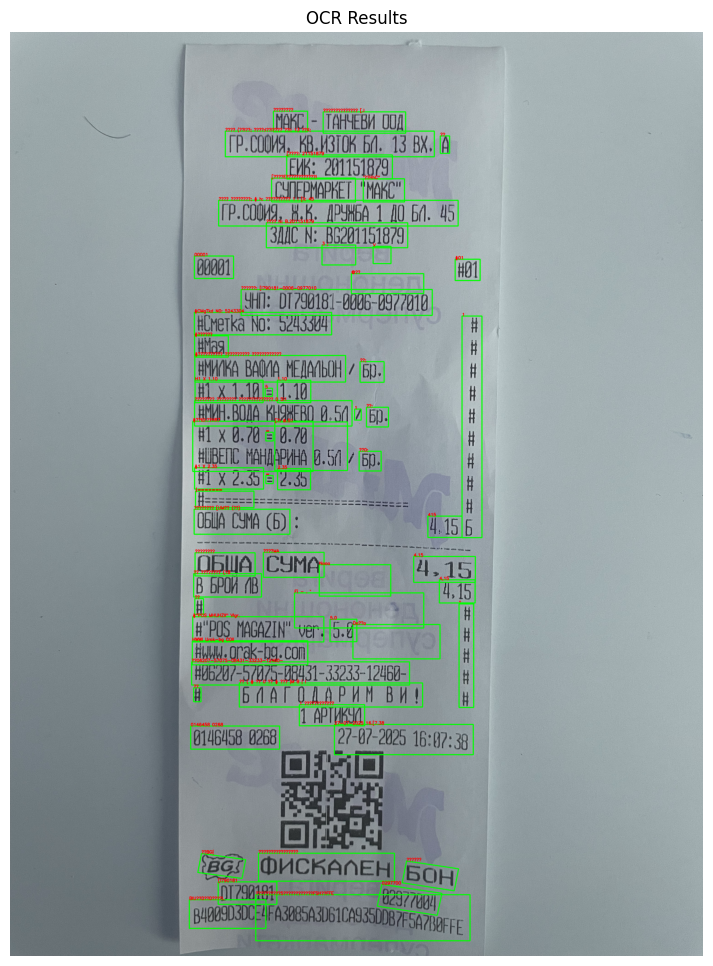

In [25]:
display_results(results,image_np,'maks_1')

In [26]:
for bbox, text, confidence in results:
    pts = [tuple(map(int, point)) for point in bbox]
    print(f'{pts} - {text}')

[(1149, 345), (1298, 345), (1298, 435), (1149, 435)] - МНКГ
[(1366, 348), (1726, 348), (1726, 441), (1366, 441)] - ТМНЧЕВИ [.l
[(939, 432), (1851, 432), (1851, 544), (939, 544)] - ГР (ФIЯ; КВ:IЗIОК Бl: 13 ВX;
[(1877, 453), (1918, 453), (1918, 529), (1877, 529)] - М
[(1207, 536), (1668, 536), (1668, 641), (1207, 641)] - [ИК: 21151879
[(1141, 637), (1507, 637), (1507, 741), (1141, 741)] - [ЧПEРМНРКЕI
[(1541, 640), (1721, 640), (1721, 741), (1541, 741)] - 'МHhC"
[(910, 734), (1955, 734), (1955, 846), (910, 846)] - ГР СОФИ; # h: ДРЧБН 1 I [il: 45
[(1118, 832), (1735, 832), (1735, 941), (1118, 941)] - ЗД N: B.201151879
[(1361, 929), (1508, 929), (1508, 1016), (1361, 1016)] - 3 ;
[(1584, 935), (1662, 935), (1662, 1010), (1584, 1010)] - V
[(804, 977), (975, 977), (975, 1075), (804, 1075)] - 00001
[(1942, 991), (2051, 991), (2051, 1084), (1942, 1084)] - #01
[(1489, 1054), (1805, 1054), (1805, 1141), (1489, 1141)] - @Л
[(1008, 1123), (1842, 1123), (1842, 1236), (1008, 1236)] - ЧНП: [I790181-000